# ADS - Network analysis module. Homework 2

In [1]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy import optimize
#scipy.stats.bernoulli
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


load assingment data

In [2]:
dataA=pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework2/networkA.csv' , header=0 )
XY=pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework2/networkA_XY.csv' , header=0 )

In [3]:
dataB=pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework2/networkB.csv' , header=0 )
PB=pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework2/PB.csv' , header=0 )

In [4]:
dataA.head(2)
#print 'ue'dataB.head()

,Unnamed: 0,a,b,w
0,0,0,33,90.500690
1,1,0,4,39.631544


## Problem 1 (20% of credit)

Find and visualize shortest path between nodes 1 and 20 in the above spatial network A i
n terms of
a) network topology
b) spatial distance

In [5]:
XY.head(2)

,Unnamed: 0,X,Y
0,0,0.635022,1.735313
1,1,8.586500,-0.953554


In [6]:
PB.head(2)  ## P denotes population 

,Unnamed: 0,P
0,0,15.210213
1,1,15.693742


In [7]:
Hw = nx.DiGraph()

In [8]:
##adding weight attribute
nx.set_edge_attributes(Hw,'weight',0)

In [9]:
## adding edge to the graph Hw
for e in dataA.index:
    Hw.add_edge(dataA.a[e],dataA.b[e],weight=dataA.w[e])

In [10]:
x = nx.shortest_path(Hw,1,20)
print 'The shortest path between 1 and 20 not considering weight is  ',x 

The shortest path between 1 and 20 not considering weight is   [1, 18.0, 20]


## The shortest path between 1 and 20 not considering weight is   [1, 18.0, 20]

In [11]:
x = nx.shortest_path(Hw,1,20,'weight')
print 'The shortest path between 1 and 20 is considering the edge weight is  ',x 

The shortest path between 1 and 20 is considering the edge weight is   [1, 33.0, 41.0, 20.0]


# #The shortest path between 1 and 20 is considering the edge weight is   [1, 33.0, 41.0, 20.0]

In [12]:
#create a dictionary for registering all the coordinates
IntPos={}
for c in XY.index:
    IntPos[c]=(XY.X[c],XY.Y[c])

In [13]:
nx.set_edge_attributes(Hw,'dist',0)

In [14]:
#auxiliary function - visualize path on the map
def visualize_path(path):
    plt.figure(figsize = (15,18))
    nx.draw(Hw,pos=IntPos,with_labels=True,arrows=False,node_size=10,width=1,edge_color='y')
    x=[IntPos[v][0] for v in path]
    y=[IntPos[v][1] for v in path]
    plt.plot(x,y,'ro-')
    plt.plot([x[0],x[-1]],[y[0],y[-1]],'bs',markersize=5)

In [15]:
## calculating the distance  (eucladian)
def eucdis(p1,q1,p2,q2):
    return np.sqrt((p2-p1)**2 + (q2-q1)**2)  ## applying the pythagorus theorm
    


In [16]:
for e in Hw.edges():
    Hw[e[0]][e[1]]['dist']=eucdis(IntPos[e[0]][0],IntPos[e[0]][1],IntPos[e[1]][0],IntPos[e[1]][1])

In [17]:
x1 = nx.shortest_path(Hw,1,20,'dist')
print 'shortest path spatially is ',x1

shortest path spatially is  [1, 49.0, 0.0, 41.0, 20.0]


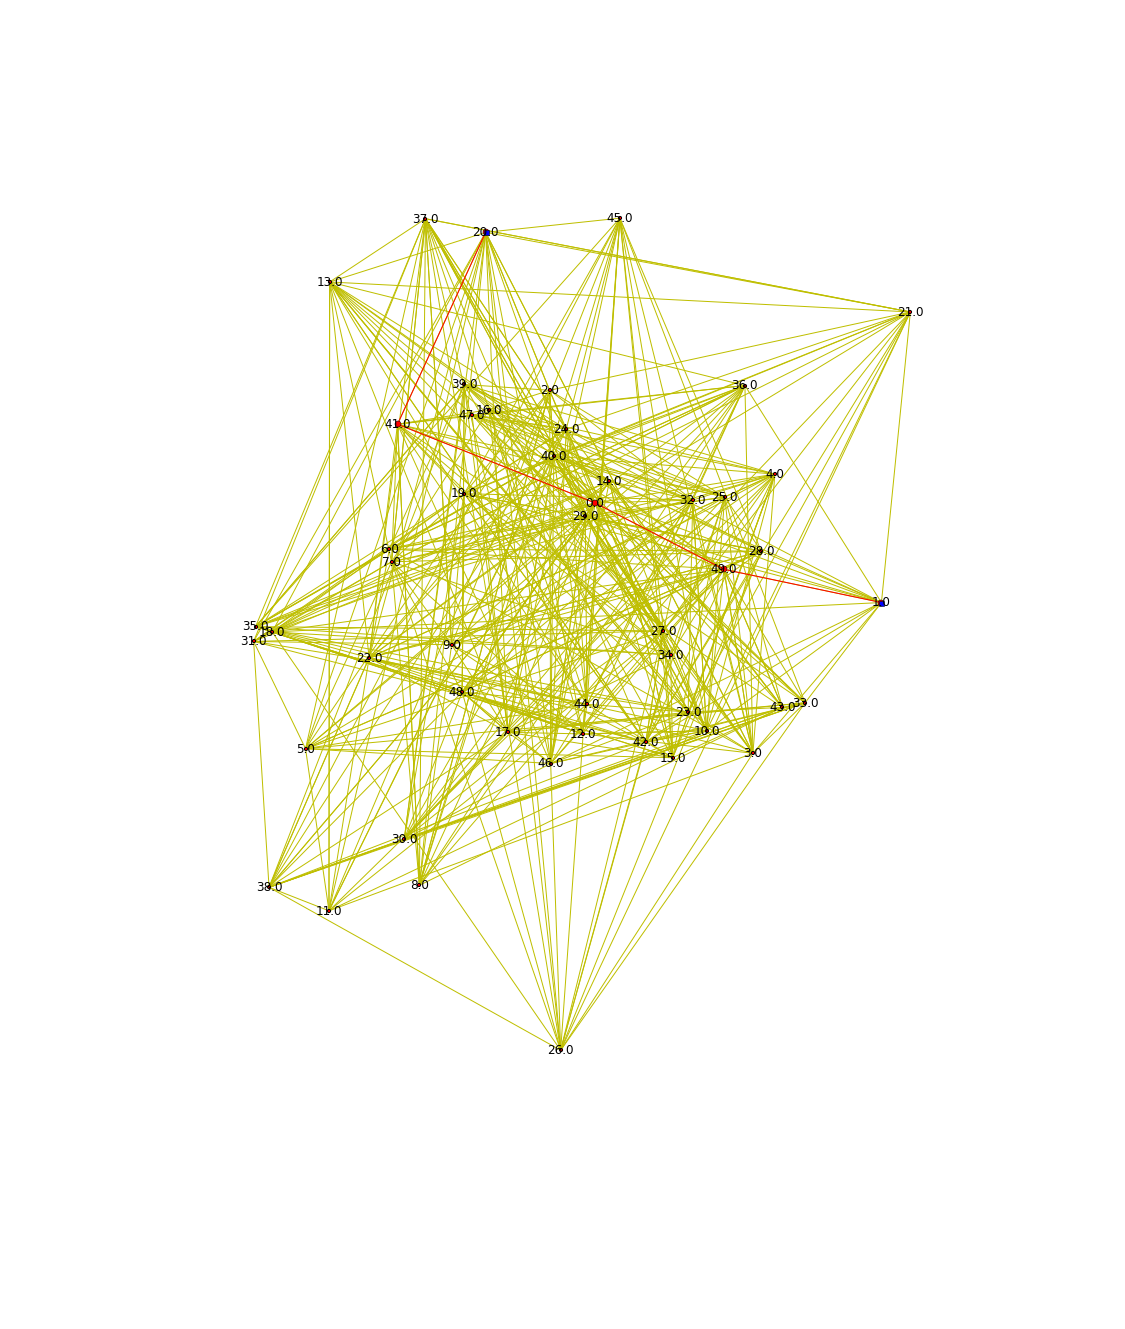

In [18]:
visualize_path(x1)

## Problem 2 (20% of credit)

In the above spatial network A (defined by a weighted edge list dataA and nodes spatial locations XY) find the pair of nodes with the higest shortest path length between them in terms of network topology. Visualize the shortest path between the two nodes

In [19]:
x = nx.all_shortest_paths(Hw,1,20,weight='weight')

In [20]:
print([p for p in nx.all_shortest_paths(Hw,source=13,target=43,weight='weight')])

[[13, 49.0, 43]]


In [21]:
## calculating the shortest length for all the nodes in the graph using dijasktra path length 
m = nx.all_pairs_dijkstra_path_length(Hw,weight='weight')

In [22]:
n=list(m.itervalues())

In [23]:
o,p,q = 0,0,0

In [24]:
o,p,q = 0,0,0
for i in range(len(n)):
    for j in n[i]:
        if(o<n[i][j]):
            o=n[i][j]
            p=i
            q=j
            print p,q,o
        
        

0 1.0 111.456785475
0 5.0 127.461159289
0 11.0 134.260334017
0 45.0 163.920006697
1 20.0 164.608188329
2 20.0 165.744861923
2 45.0 182.150844478
5 6.0 219.071452317


In [25]:
print 'The highest shortest path length is between', p,q ,'weight is ', o

The highest shortest path length is between 5 6.0 weight is  219.071452317


# The highest shortest path length is between 5  to 6.0 weight is  219.071452317

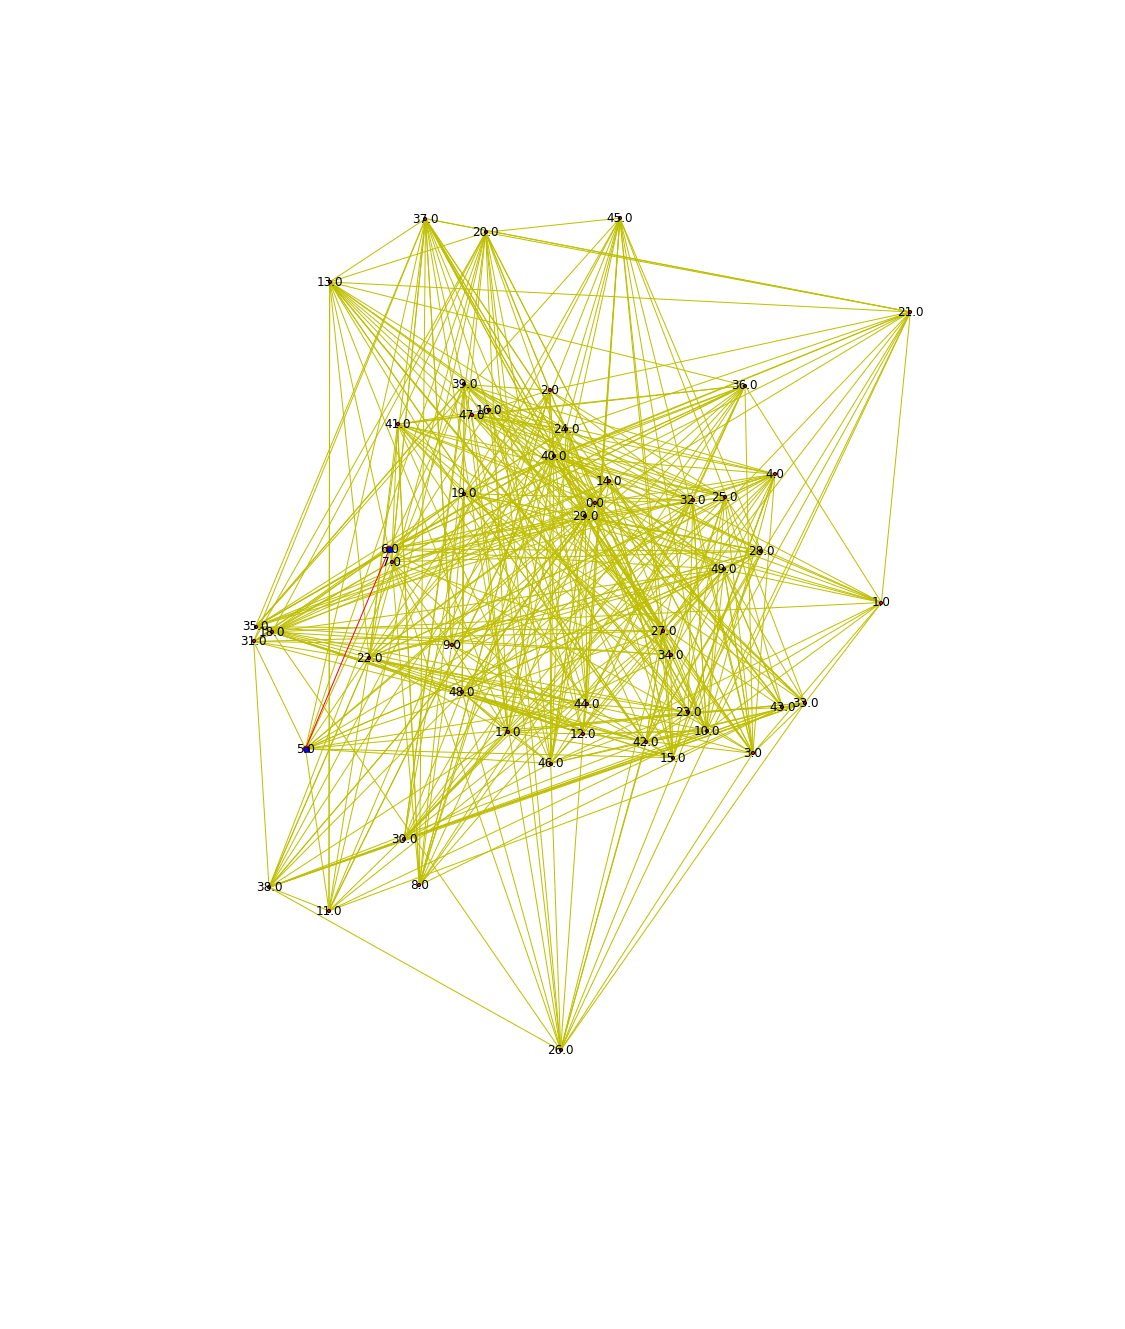

In [26]:
### Visualizing the shortest path 
visualize_path([5,6])

## Problem 3 (30% of credit)

For the above spatial network B (defined by a weighted edge list dataB, nodes spatial locations XY) with given weigths $w$ from PB, fit the gravity model (over the entire network) 
$$
e(a,b)=k\cdot w(a)^\alpha w(b)^\beta d(a,b)^{-\gamma},
$$
report the exponents $\alpha$, $\beta$, $\gamma$ and the statistics for the model fit. Visualize the model fit.

In [27]:
Hw1 = nx.DiGraph()

In [28]:
##setting edge weight from the dataB table
nx.set_edge_attributes(Hw1,'weight',0)
for e in dataB.index:
    Hw1.add_edge(dataB.a[e],dataB.b[e],weight= dataB.w[e])

In [29]:
## adding the distacne from the geodistance X and Y
nx.set_edge_attributes(Hw1,'dist',0)
for e in Hw1.edges():
    Hw1[e[0]][e[1]]['dist']=eucdis(IntPos[e[0]][0],IntPos[e[0]][1],IntPos[e[1]][0],IntPos[e[1]][1])

# ##fitting the standard gravity model

In [30]:
##adding  the population to it 
D={}
for e in PB.index:
    D[e]=PB.P[e]    

In [31]:
Hw1_wout=Hw1.out_degree(weight='weight')  ## w1 ...this has been used in the normalization wala part. 
Hw1_win=Hw1.in_degree(weight='weight')

In [32]:
data = pd.DataFrame({'d':[],'e':[],'w1':[],'w2':[]})
for e in Hw1.edges(data=True):
    print e  ## every e is a dicitonary here
    i=data.index.max()
    if isnan(i):
        i=-1
    data.loc[i+1]=[e[2]['dist'],e[2]['weight'],D[e[0]],D[e[1]]]

(0.0, 1.0, {'dist': 8.3938079550688514, 'weight': 0.056916545703199997})
(0.0, 2.0, {'dist': 3.2954769834487534, 'weight': 0.042925310533499995})
(0.0, 3.0, {'dist': 8.0557483871426481, 'weight': 0.012604206764200002})
(0.0, 4.0, {'dist': 5.0522053376251463, 'weight': 0.073283459098199999})
(0.0, 5.0, {'dist': 10.428571152151234, 'weight': 0.0028430804332300001})
(0.0, 6.0, {'dist': 5.849587413220525, 'weight': 0.025764545362499999})
(0.0, 7.0, {'dist': 5.8750768901263495, 'weight': 0.031619889797099995})
(0.0, 8.0, {'dist': 11.422486771372592, 'weight': 0.0073230344562600002})
(0.0, 9.0, {'dist': 5.5286436893496393, 'weight': 0.034361666253800001})
(0.0, 10.0, {'dist': 6.8853141526169193, 'weight': 0.045935767971199991})
(0.0, 11.0, {'dist': 13.265716171501348, 'weight': 0.00595717073442})
(0.0, 12.0, {'dist': 6.2462531571432995, 'weight': 0.042161833741499996})
(0.0, 13.0, {'dist': 9.4882610367420721, 'weight': 0.017030530693799999})
(0.0, 14.0, {'dist': 0.70755459307118618, 'weight'

In [33]:
data1=data

                            OLS Regression Results                            
Dep. Variable:                 log(e)   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     2159.
Date:                Wed, 09 Dec 2015   Prob (F-statistic):               0.00
Time:                        13:15:20   Log-Likelihood:                -3198.6
No. Observations:                2450   AIC:                             6405.
Df Residuals:                    2446   BIC:                             6428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.0960      0.120    -42.518      0.0

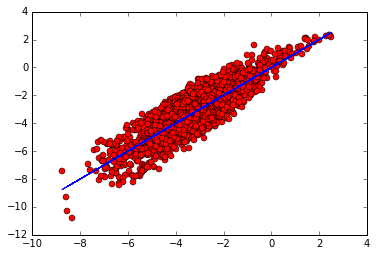

In [34]:
lm = smf.ols(formula='log(e) ~ log(d)+log(w1)+log(w2)', data = data1).fit()
print(lm.summary())
lme = lm.predict(data1)
plt.plot(lme,log(data1.e),'or')
plt.plot(lme,lme,'-b') 

# The value are :  α =0.8954 , β = 1.5160, γ=  -1.6171 . Rsquare : 0.726 and intercept is -5.0960 

## Problem 4 (30% of credit)

For the above spatial network B with given weigths $w$ and given the total strength of outgoing edges $T(a)$ estimated from the network data for each node $a$, fit the locally normalized model (over the entire network)
$$
e(a,b)=T(a) \frac{w(b)^\beta d(a,b)^{-\gamma}}{\sum_{c\neq a} w(c)^\beta d(a,c)^{-\gamma}},
$$
report the exponents $\beta$, $\gamma$. Estimate $R2$ for the fit in the log-scale of the original network. Visualize the model fit.

In [35]:
# function locally normalized gravity model fit (in terms of log-scale R2) for given exponents q
def LNGmodel(q):
    #first pass - assign relative weights as the model prediction
    for e in Hw1.edges():
        if e[0]!=e[1]:  ## avoiding the same vertex
            Hw1[e[0]][e[1]]['predict']=(Hw1[e[0]][e[1]]['dist']**q[0])*(D[e[1]]**q[1]) ## D represent w(b)β
        else:
           Hw1[e[0]][e[1]]['predict']=Hw1[e[0]][e[1]]['weight']
            
    #compute normalization factors    
    Hw1_norm=Hw1.out_degree(weight='predict')
    for a in Hw1.nodes():
        Hw1_norm[a]=(Hw1_wout[a])/(Hw1_norm[a])
    #second pass - normalize model predictions   
    E=np.array([0.0]*Hw1.size())
    me=np.array([0.0]*Hw1.size())
    i=0
    for e in Hw1.edges():
        if e[0]!=e[1]:
            Hw1[e[0]][e[1]]['predict']*=Hw1_norm[e[0]]
            #print(USmig[e[0]][e[1]]['weight'],USmig[e[0]][e[1]]['predict'])
            E[i]=Hw1[e[0]][e[1]]['weight']
            me[i]=Hw1[e[0]][e[1]]['predict']
            i+=1
    E=E[0:i]
    me=me[0:i]
    me=me[E>0]
    E=E[E>0]
    R2=1-sum(pow(log(E)-log(me),2))/sum(pow(log(E)-mean(log(E)),2))    
    return (R2,E,me) #performance and edge weights-predictions for fit visualization purposes 

In [36]:
def LNGmodelFit(q):
    #version for maximization
    return -LNGmodel(q)[0]

In [37]:
#fit model parameters
res=optimize.minimize(LNGmodelFit,[0, 1],method='Nelder-Mead')

In [38]:
res

  status: 0
    nfev: 140
 success: True
     fun: -0.98340992676071659
       x: array([-2.02918714,  1.48657092])
 message: 'Optimization terminated successfully.'
     nit: 77

In [39]:
(R2,e,me)=LNGmodel(res.x)

In [40]:
R2,e,me

(0.98340992676071659,
 array([ 0.05691655,  0.04292531,  0.01260421, ...,  0.00516567,
         0.00876664,  0.01599652]),
 array([ 0.04172778,  0.03220642,  0.0216863 , ...,  0.00640612,
         0.01147034,  0.01547288]))

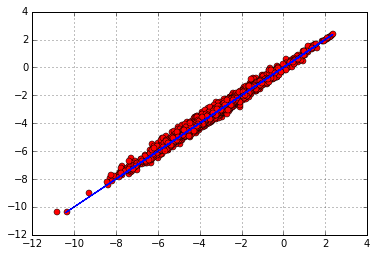

In [41]:

plt.plot(log(e),log(me),'or')
plt.plot(log(me),log(me),'-b') 
plt.grid()

#  R square for the model fit is .9834 , Beta value = -1.29864773 , gamma value = 1.48657092

## Extracredit assignment (additional 50% of credit to be applied to this or any past assignment)

Implement radiation model and apply it to US migration data. Visualize the fit. Compare it (visually and quantitatively (R2)) to that of the gravity models with global and local normalization (fitted over the entire dataset).